<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [231]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-11-15 19:46:04--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2019-11-15 19:46:05 (303 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [232]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [233]:
df.shape

(346, 10)

### Convert to date time object 

In [234]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [235]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

Text(0.5, 1.0, 'Understanding our target variables')

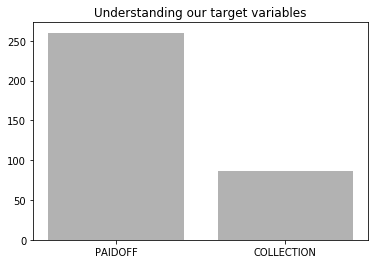

In [236]:
target_labels = df['loan_status'].value_counts()
y_bar = np.arange(350) # y-axis 
labels = ('PAIDOFF','COLLECTION') # will use as labels on the X-axis
x_values = [target_labels['PAIDOFF'],target_labels['COLLECTION']]

plt.bar(np.arange(0,2),target_labels,color='grey',alpha=0.6)
plt.xticks(np.arange(2),labels)
plt.title("Understanding our target variables")

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [8]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.9.0              |           py36_0         379 KB  anaconda
    openssl-1.1.1              |       h7b6447c_0         5.0 MB  anaconda
    ca-certificates-2019.10.16 |                0         131 KB  anaconda
    certifi-2019.9.11          |           py36_0         154 KB  anaconda
    ------------------------------------------------------------
                                           Total:         5.7 MB

The following packages will be UPDATED:

    ca-certificates: 2019.10.16-0      --> 2019.10.16-0     anaconda
    certifi:         2019.9.11-py36_0  --> 2019.9.11-py36_0 anaconda
    openssl:         1.1.1d-h7b6447c_3 --> 1.1.1-h7b6447c_0 anaconda
    seaborn:         0.9.0-py36_0     

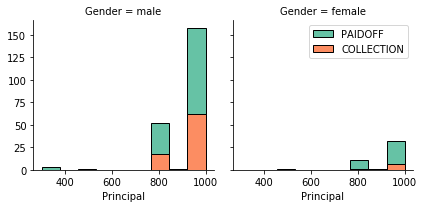

In [237]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

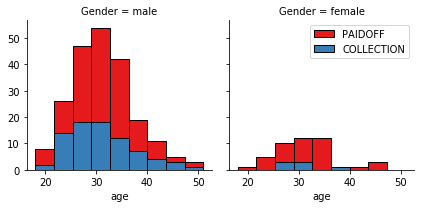

In [57]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

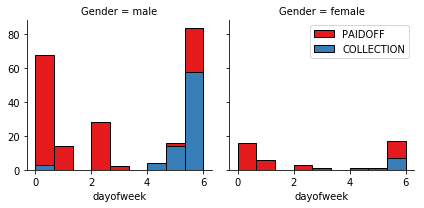

In [238]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb564f7bba8>,
      dtype=object)

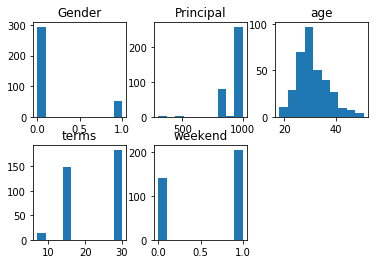

In [131]:
df.hist(column=['Principal','terms','age','Gender','weekend'],grid=False,layout=(2,3))

## Correaltions between vars

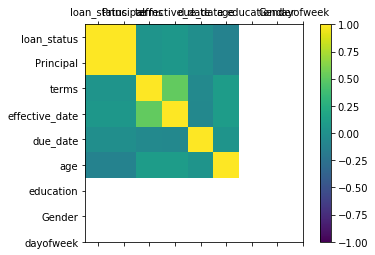

In [239]:
correlations = df.corr()
names = ['loan_status', 'Principal', 'terms',
       'effective_date', 'due_date', 'age', 'education', 'Gender', 'dayofweek',
       'weekend']
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [240]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [241]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [259]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [260]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [261]:
Feature = df[['Principal','terms','age','Gender','weekend','dayofweek']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,45,0,0,3,0,1,0
1,1000,30,33,1,0,3,1,0,0
2,1000,15,27,0,0,3,0,0,1
3,1000,30,28,1,1,4,0,0,1
4,1000,30,29,0,1,4,0,0,1


In [262]:
print("We have {} features and they are {}".format(len(Feature.columns),Feature.columns))

We have 9 features and they are Index(['Principal', 'terms', 'age', 'Gender', 'weekend', 'dayofweek',
       'Bechalor', 'High School or Below', 'college'],
      dtype='object')


### Feature selection

Lets defind feature sets, X:

In [263]:
X = Feature
X.head()

,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,45,0,0,3,0,1,0
1,1000,30,33,1,0,3,1,0,0
2,1000,15,27,0,0,3,0,0,1
3,1000,30,28,1,1,4,0,0,1
4,1000,30,29,0,1,4,0,0,1


What are our lables?

In [327]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [377]:
# We have to encode our target labels as 0 ad 1
y = df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1]).values
y[304:310]

array([1, 1, 1, 1, 1, 1])

In [378]:
y.shape

(346,)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [379]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.26122054, -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
        -0.26122054,  2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.26122054, -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
         0.12175534, -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
         0.12175534, -0.38170062, -0.87997669,  1.14984679]])

In [380]:
X.shape

(346, 9)

In [330]:
# let's get these darn imports out of the way first
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
TrainingScores = {}  # a dictionary that will come in handy to keep track of all the scores
X_train,y_train = X,y

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [257]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [381]:
#I'll apply k-folds cross validation for each k 
#It shuffles the data randomly and then splits it into 10 groups
# then it uses the latter 9 as testing set and first as training 
# then we have a score 
# it repeats the same process 10 times 
# returning an array with shape len(k),
# I will be using a 10-fold cross validation technique here
# Here the k in the main loop is the K for k-nearest neighbours
# the above steps will be repeated for all values of K

best_score = 0.0
for k in range(3,16):
    
    # classifier 
    knn_clf = KNeighborsClassifier(n_neighbors=k,algorithm='auto')
    
    # score the model using k-fold validation
    scores = cross_val_score(knn_clf, X, y, cv=10)
    score=scores.mean()
    if score > best_score:
        best_score=score
        best_clf = knn_clf
        bestK=k

In [382]:
print(bestK)
print(best_score)

8
0.7522689075630252


In [383]:
# I am using my entire dataset for training
finalknnclf = KNeighborsClassifier(n_neighbors=7)
finalknnclf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [384]:
predictions = finalknnclf.predict(X)

In [385]:
TrainingScores['knn-jaccard'] = jaccard_similarity_score(y,predictions)

In [386]:
TrainingScores['knn-f1'] = f1_score(y,predictions,average='weighted')

In [387]:
print(TrainingScores)

{'knn-jaccard': 0.8034682080924855, 'knn-f1': 0.7930445292892236, 'LR-jaccard': 0.7630057803468208, 'LR-f1': 0.7088399037150602, 'LR-logloss': 0.43174993676801543}


# Decision Tree

In [468]:
from sklearn import tree

In [469]:
clf_dtree = tree.DecisionTreeClassifier(criterion='entropy')

In [472]:
y_tree = df['loan_status']

In [475]:
clf_dtree.fit(X,y_tree)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [477]:
tree_preds = clf_dtree.predict(X)
TrainingScores['DecsionTree-jaccard'] = jaccard_similarity_score(y_tree,tree_preds)

In [478]:
TrainingScores['DecsionTree-f1'] = f1_score(y_tree,tree_preds,average='weighted')

## Visualizing the tree

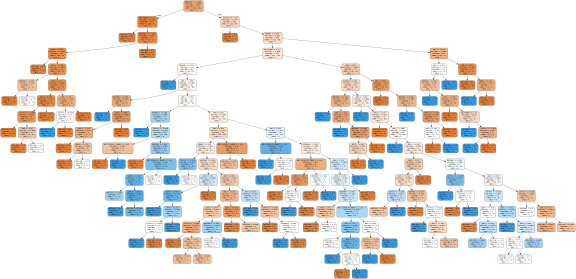

In [500]:
!pip install graphviz
!pip install pydotplus
import graphviz 
import pydotplus

dot_data = tree.export_graphviz(clf_dtree, out_file=None, 
                     feature_names=['Principal',
                                    'terms','age',
                                    'Gender',
                                    'weekend',
                                    'Bechalor',
                                    'High School or Below',
                                    'college',
                                    'dayofweek',
                                     #'deadline'
#                                     ,'Month'
                                   ],  
                     class_names='loan_status',  
                     filled=True, rounded=True,  
                     special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"8,8!"')
gvz_graph = graphviz.Source(graph.to_string())
graph.write_png('tree.png')
gvz_graph

# Support Vector Machine

In [429]:
from sklearn import svm 
y_svm = df['loan_status']
X.shape

(346, 9)

In [432]:
y_svm[0:5]

0    PAIDOFF
1    PAIDOFF
2    PAIDOFF
3    PAIDOFF
4    PAIDOFF
Name: loan_status, dtype: object

In [433]:
y_svm.replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)

In [435]:
y_svm = y_svm.astype(float)

In [454]:
clf_svm = svm.SVC(kernel='rbf')
linear_svm = svm.LinearSVC(random_state=10)
clf_svm.fit(X, y_svm) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [455]:
svm_predictions = clf_svm.predict(X)

In [459]:
TrainingScores['SVM-jaccard'] = jaccard_similarity_score(y_svm,svm_predictions)
TrainingScores['SVM-f1'] = f1_score(y_svm,svm_predictions,average='weighted')

In [460]:
TrainingScores

{'knn-jaccard': 0.8034682080924855,
 'knn-f1': 0.7930445292892236,
 'LR-jaccard': 0.7630057803468208,
 'LR-f1': 0.7088399037150602,
 'LR-logloss': 0.43174993676801543,
 'SVM-jaccard': 0.7687861271676301,
 'SVM-f1': 0.683672614559772}

# Logistic Regression

In [319]:
from sklearn.linear_model import LogisticRegression

In [358]:

clf_log = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial')
clf_log.fit(X_train, y_train)

y_pred=clf_log.predict(X_train)
y_proba=clf_log.predict_proba(X_train)


In [359]:
TrainingScores['LR-jaccard'] = jaccard_similarity_score(y_train,y_pred)
TrainingScores['LR-f1'] = f1_score(y_train,y_pred,average='weighted')
TrainingScores['LR-logloss'] = log_loss(y_train,y_proba)

In [512]:
TrainingScores

{'knn-jaccard': 0.8034682080924855,
 'knn-f1': 0.7930445292892236,
 'LR-jaccard': 0.7630057803468208,
 'LR-f1': 0.7088399037150602,
 'LR-logloss': 0.43174993676801543,
 'SVM-jaccard': 0.7687861271676301,
 'SVM-f1': 0.683672614559772,
 'DecsionTree-jaccard': 0.9277456647398844,
 'DecsionTree-f1': 0.924927020820985}

# Model Evaluation using Test set

First, download and load the test set:

In [182]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-11-15 19:26:54--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-11-15 19:26:54 (398 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [188]:
# Dictionary that stores final testing scores
TestingScores = {}

### Load Test set for evaluation 

In [194]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [370]:
test_df['loan_status'].value_counts()

PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64

In [290]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek

test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

#test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

# test_df['Month'] = test_df.due_date.dt.month 

# test_df['deadline']=test_df['due_date']-test_df['effective_date']
# test_df['deadline']=test_df['deadline'].dt.days

Feature_test = test_df[['Principal','terms','age','Gender','weekend','dayofweek']]


In [291]:
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['education'])], axis=1)

In [294]:
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)

In [364]:
Feature_test.shape

(54, 9)

In [391]:
x = Feature_test
y_test_final = test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1]).values
lr_y = y_test_final.astype(float)

In [392]:
lr_y.shape

(54,)

In [308]:
testy=y.astype(float)

In [463]:
testy.shape

(54,)

In [394]:
x = preprocessing.StandardScaler().fit(x).transform(x)

In [461]:
x.shape

(54, 9)

# KNN

In [397]:
# KNN
knn_predict=finalknnclf.predict(x)
TestingScores['knn-jaccard'] = jaccard_similarity_score(testy,knn_predict)
TestingScores['knn-f1'] = f1_score(testy,knn_predict,average='weighted')
TestingScores

{'knn-jaccard': 0.7407407407407407, 'knn-f1': 0.7339309290528803}

In [398]:
knn_predict

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0])

In [399]:
TestingScores

{'knn-jaccard': 0.7407407407407407, 'knn-f1': 0.7339309290528803}

# Logistic Regression

In [400]:
log_predictions = clf_log.predict(x)
log_proba = clf_log.predict_proba(x)

In [421]:
#TestingScores['LR-jaccard'] = jaccard_similarity_score(test_df['loan_status'],log_predictions)
#TestingScores['LR-f1'] = f1_score(test_df['loan_status'],log_predictions,average='weighted')
TestingScores['LR-logloss'] = log_loss(lr_y,log_proba)

In [422]:
TestingScores

{'knn-jaccard': 0.7407407407407407,
 'knn-f1': 0.7339309290528803,
 'LR-jaccard': 0.7777777777777778,
 'LR-f1': 0.708937198067633,
 'LR-logloss': 1.893663098545576}

# SVM

In [464]:
svm_test_predictions = clf_svm.predict(x)
TestingScores['svm-jaccard'] = jaccard_similarity_score(testy,svm_test_predictions)
TestingScores['svm-f1'] = f1_score(testy,svm_test_predictions,average='weighted')

In [505]:
x[0:2]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
        -0.28674019,  2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
         0.10035907, -0.41702883, -0.79772404, -0.86135677]])

In [506]:
testy

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

# Decision Tree

In [507]:
final_tree_preds = clf_dtree.predict(x)

In [508]:
TestingScores['DecisionTree-jaccard'] = jaccard_similarity_score(testy,final_tree_preds)
TestingScores['DecisionTree-f1'] = f1_score(testy,final_tree_preds,average='weighted')

In [509]:
for k,v in TestingScores.items():
    print("{} - {}".format(k,round(v,4)))

knn-jaccard - 0.7407
knn-f1 - 0.7339
LR-jaccard - 0.7778
LR-f1 - 0.7089
LR-logloss - 1.8937
svm-jaccard - 0.7222
svm-f1 - 0.6213
DecisionTree-jaccard - 0.7407
DecisionTree-f1 - 0.7461


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.7407  | 0.7339   | NA      |
| Decision Tree      | 0.7407  | 0.7461   | NA      |
| SVM                | 0.7222  | 0.6213   | NA      |
| LogisticRegression | 0.7778  | 0.7089   | 1.8937  |

# In conclusion, Logistic Regression proved to be the best model with a Jaccard score of 0.7778 and a log loss of 1.8937 which is awesome!

In [513]:
for k,v in TrainingScores.items():
    print("{} - {}".format(k,round(v,4)))

knn-jaccard - 0.8035
knn-f1 - 0.793
LR-jaccard - 0.763
LR-f1 - 0.7088
LR-logloss - 0.4317
SVM-jaccard - 0.7688
SVM-f1 - 0.6837
DecsionTree-jaccard - 0.9277
DecsionTree-f1 - 0.9249


# training insights

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.8035  | 0.793    | NA      |
| Decision Tree      | 0.9277  | 0.9249   | NA      |
| SVM                | 0.7688  | 0.6837   | NA      |
| LogisticRegression | 0.763   | 0.7088   | 0.4317  |

<hr> 
In 

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>